# DEEP LEARNING REGRESSION

#### IGNORING WARNINGS

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

#### CREATING REGRESSION DATASET USING SCIKIT LEARN

In [3]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=3000, n_features=30,
                       n_informative=28, noise=10, random_state=42)

In [4]:
x

array([[-0.71827942, -0.07007371, -2.8807235 , ...,  0.55875312,
        -0.87841759, -0.31143446],
       [-0.12946552,  0.4509102 , -0.22386779, ...,  0.47038416,
        -2.21539143,  1.3816385 ],
       [ 0.24136957,  1.13337657,  0.07615875, ..., -0.92070334,
         0.20400935,  0.85537708],
       ...,
       [ 1.56947425, -0.98543931, -0.68558038, ...,  0.19199239,
         0.47005926,  0.50240498],
       [ 0.696168  ,  1.64337816, -0.08809124, ...,  0.75109945,
        -1.97548777, -2.06508305],
       [ 0.17293044,  1.05127132, -0.55991632, ..., -0.04062406,
        -0.44272303,  1.14910819]])

In [5]:
x.shape

(3000, 30)

In [6]:
y

array([ -45.03468463, -253.02652499,  496.76697472, ...,  207.02333227,
       -828.35114667,  -98.9642237 ])

#### CONVERTING X AND Y TO A DATAFRAME

In [8]:
cols = [f'x{i+1}' for i in range(30)]

In [9]:
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [10]:
import pandas as pd
x = pd.DataFrame(x, columns=cols)

In [11]:
x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.718279,-0.070074,-2.880723,-0.291797,-1.279408,0.360495,-2.030042,-0.426785,0.442853,0.112514,...,-1.379176,0.545999,-1.238762,0.210254,2.233469,0.501408,0.311878,0.558753,-0.878418,-0.311434
1,-0.129466,0.450910,-0.223868,-1.127200,-0.765647,-0.194988,-0.887412,0.706774,-0.341742,0.092110,...,0.767348,-1.111131,-1.120872,-0.434288,0.826882,-0.244658,0.296457,0.470384,-2.215391,1.381639
2,0.241370,1.133377,0.076159,-0.597106,-0.569812,-1.097820,-0.405152,0.360265,0.296881,-0.184067,...,-0.519368,1.398581,1.022523,-0.081239,0.339850,1.128266,1.101489,-0.920703,0.204009,0.855377
3,-0.066140,1.154356,0.065168,0.251785,-0.178338,-1.304646,-1.776299,-1.545955,-1.463394,-0.137389,...,0.376657,1.021651,1.064456,-1.066433,-1.620960,1.388090,1.764874,-0.946784,-0.095042,1.812141
4,0.630665,-1.333967,-0.606582,1.170996,1.342460,-1.284969,1.374057,-1.007511,-0.323503,0.265850,...,-0.500754,0.169756,0.967334,0.028729,0.757923,0.563454,0.625839,0.074512,-0.593699,-0.572639


In [12]:
y = pd.DataFrame(y, columns=['y'])

In [13]:
y.head()

,y
0,-45.034685
1,-253.026525
2,496.766975
3,-4.601647
4,236.457790


#### CREATING A SCIKIT LEARN PIPELINE FOR X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [17]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.688919,-0.057155,-2.863120,-0.305510,-1.275101,0.352911,-1.974449,-0.412523,0.431024,0.109518,...,-1.402585,0.574088,-1.226719,0.191083,2.186029,0.475576,0.347794,0.578474,-0.918601,-0.325387
1,-0.105807,0.470406,-0.205413,-1.147154,-0.763248,-0.201377,-0.849465,0.716442,-0.367298,0.090012,...,0.772182,-1.104212,-1.110130,-0.448803,0.802196,-0.276927,0.332451,0.489438,-2.268167,1.395733
2,0.261436,1.161488,0.094710,-0.613100,-0.568141,-1.102267,-0.374652,0.371337,0.282499,-0.174010,...,-0.531464,1.437562,1.009621,-0.098304,0.323041,1.107841,1.133389,-0.912149,0.174020,0.860754
3,-0.043094,1.182733,0.083716,0.242134,-0.178121,-1.308648,-1.724625,-1.527157,-1.508573,-0.129386,...,0.376350,1.055817,1.051092,-1.076381,-1.606051,1.369906,1.793399,-0.938426,-0.127848,1.833367
4,0.646962,-1.337003,-0.588250,1.168212,1.337030,-1.289013,1.377081,-0.990895,-0.348739,0.256105,...,-0.512606,0.193039,0.955041,0.010869,0.734352,0.538156,0.660157,0.090578,-0.631202,-0.590918


#### APPLYING TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [19]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1643,0.052039,-0.940475,-0.943021,-0.987331,1.090220,1.585467,-0.678379,-1.139013,-0.171146,-1.170170,...,0.922744,0.526633,0.016138,0.607965,0.333314,-1.520318,0.257526,-0.046280,0.278598,0.122691
137,1.253791,-0.710742,-1.791321,1.539163,-1.114221,1.012629,0.244713,-1.926104,-0.445870,-0.629977,...,-1.077994,-0.744548,-1.040224,0.435301,-0.454281,1.101016,-0.416873,-0.970135,-0.663722,0.115474
1205,0.252961,-0.020081,-0.787437,1.481952,-0.891972,0.763080,0.103481,-0.422697,-0.032422,-0.897198,...,-0.213005,-0.275669,0.743194,-0.255197,-0.662567,-0.740384,1.096108,2.044021,-1.143672,0.657581
523,0.522782,-0.644630,-0.164250,-0.473433,1.297058,1.305110,0.098092,-0.510435,1.836239,0.641412,...,-0.738259,1.205840,1.346459,0.796726,1.464666,1.285444,-0.318203,1.055037,1.077651,-0.034905
1493,-0.257471,0.131504,-0.411423,0.237039,1.631228,1.070852,-1.716534,-1.038329,0.608915,0.980584,...,-1.106273,-0.672314,-0.409232,-0.574227,-0.049304,-1.098888,0.582422,-1.028832,1.017513,1.018863


In [20]:
ytrain.head()

,y
1643,112.433915
137,-1083.527732
1205,-128.674183
523,761.187440
1493,-172.902429


In [22]:
ytest.head()

,y
465,-153.360317
904,-827.315745
2639,715.436126
2125,528.030227
1962,-44.600383


#### BUILDING A NEURAL NETWORK

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# initialize the neural network
model = Sequential()

# Create hidden layer 1
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))

# Create second hidden layer
model.add(Dense(units=32, activation='relu'))

# Create a output layer
model.add(Dense(units=1, activation='linear'))

#### COMPILING THE MODEL

In [25]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [27]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


60/60 [==============================] - 4s 12ms/step - loss: 112360.1016 - mae: 265.4247 - val_loss: 115068.1016 - val_mae: 271.0081
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 109021.2969 - mae: 261.2586 - val_loss: 108024.3047 - val_mae: 262.1355
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 95822.0000 - mae: 243.7158 - val_loss: 85680.8984 - val_mae: 231.6882
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 67034.2812 - mae: 199.3260 - val_loss: 49368.6602 - val_mae: 170.7363
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 32314.8203 - mae: 130.2192 - val_loss: 17982.1465 - val_mae: 94.2835
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 10324.9248 - mae: 66.3986 - val_loss: 4900.9263 - val_mae: 46.1777
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 3115.2390 - mae: 38.1406 - val_loss: 1762.7028 - val_mae: 30.1317


### PLOTTING THE LEARNING CURVE

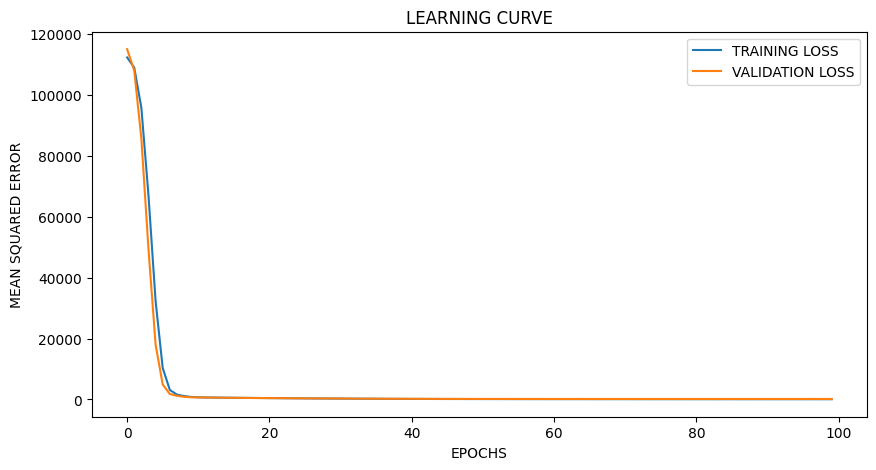

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='TRAINING LOSS')
plt.plot(hist.history['val_loss'], label='VALIDATION LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('MEAN SQUARED ERROR')
plt.title('LEARNING CURVE')
plt.legend()
plt.show()

#### EVALUATE THE MODEL

In [32]:
model.evaluate(xtrain, ytrain)

75/75 [==============================] - 0s 3ms/step - loss: 71.1671 - mae: 6.3566


[71.16710662841797, 6.356574535369873]

In [33]:
model.evaluate(xtest, ytest)

19/19 [==============================] - 0s 3ms/step - loss: 164.3405 - mae: 9.9815


[164.34048461914062, 9.981472969055176]

#### PREDICTING VALUES FOR TRAIN AND TEST

In [34]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

19/19 [==============================] - 0s 3ms/step


In [35]:
ypred_tr[0:5]

array([[  114.669426],
       [-1060.7904  ],
       [ -120.990715],
       [  763.7546  ],
       [ -181.0295  ]], dtype=float32)

In [37]:
ytrain.head()

,y
1643,112.433915
137,-1083.527732
1205,-128.674183
523,761.187440
1493,-172.902429


In [38]:
ypred_ts[0:5]

array([[-151.89241 ],
       [-829.7485  ],
       [ 722.6494  ],
       [ 520.0432  ],
       [ -56.058365]], dtype=float32)

In [39]:
ytest.head()

,y
465,-153.360317
904,-827.315745
2639,715.436126
2125,528.030227
1962,-44.600383


#### CALCULATING R2 SCORE IN TRAIN AND TEST

In [40]:
from sklearn.metrics import r2_score

In [41]:
tr_r2 = r2_score(ytrain, ypred_tr)
tr_r2

0.9993729848593188

In [42]:
ts_r2 = r2_score(ytest, ypred_ts)
ts_r2

0.998618242210318

#### SAVING THE NEURAL NETWORK MODEL FOR GIVEN DATASET

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.save('REGRESION.KERAS')

INFO:tensorflow:Assets written to: REGRESION.KERAS\assets


INFO:tensorflow:Assets written to: REGRESION.KERAS\assets


#### LOADING THE MODEL

In [46]:
from keras.models import load_model
nn = load_model('REGRESION.KERAS')
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
